## This notebook plots several climate metrics using different sizes of GARD ensembles

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os
import matplotlib as mpl
import random
from datetime import datetime,timedelta
import numpy as np
from IPython import display
from matplotlib import rcParams
import matplotlib.patches as mpatches
from analysisFuncs import label_plot, plot_map, ens_list, regions, getRegion, templates


5
5
5
20
20
20
100
5
5
5
20
20
20
100


findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


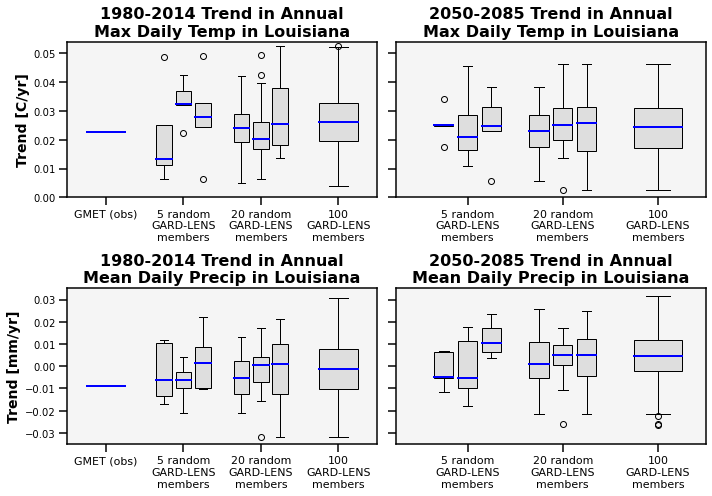

In [29]:

cesm_yr_list = np.arange(1980,2011,10)


r = regions['LA']
gcm = 'cesmlens2'
obs = 'gmet'
var = 't_mean'
stat = 'max'

colors = ['b','orange','m']
positions=[1.,1.75,2.,2.25,2.75,3.,3.25,4.]
widths = (0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.5)

trends = {}
futuretrends = {}

gmet_mean = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GMET_stats_CONUS.nc')['%s_%s'%(var,stat)]
trends['GMET(obs)'] = getRegion(gmet_mean,r).mean(('lat','lon')).polyfit(dim="year", deg=1,skipna=True).polyfit_coefficients.sel(degree=1)

n=0
for n_ens in (5,5,5,20,20,20,100):
    
    randnums = np.sort(random.sample(range(0, 100), n_ens))
    ens_subset = np.array(ens_list[gcm])[randnums]
    print(n_ens)

    gard_ens = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GARDLENS_%s_stats_CONUS.nc'%var)[stat]
    gard_ens = gard_ens.sel(n_ens=gard_ens.gcm==gcm)
    
    j=0
    for e in ens_subset:

        ds = gard_ens.sel(n_ens=gard_ens.ens==e)[0,:,:,:]
        subset = getRegion(ds,r,time=('1980','2014'),time_var='year').polyfit(dim = "year", deg = 1).mean(('lat','lon'))
        
        if j==0:
            trends['GARD%d%d'%(n_ens,n)] = [subset.polyfit_coefficients.sel(degree=1)]
        else:
            trends['GARD%d%d'%(n_ens,n)].append(subset.polyfit_coefficients.sel(degree=1))
        
        subset = getRegion(ds,r,time=('2050','2085'),time_var='year').polyfit(dim = "year", deg = 1).mean(('lat','lon'))
        
        if j==0:
            futuretrends['GARD%d%d'%(n_ens,n)] = [subset.polyfit_coefficients.sel(degree=1)]
        else:
            futuretrends['GARD%d%d'%(n_ens,n)].append(subset.polyfit_coefficients.sel(degree=1))

        j=1
    n+=1
            
    

rcParams['font.family'] = ['sanserif']
labels2 = ('GMET (obs)','5 random\nGARD-LENS\nmembers','20 random\nGARD-LENS\nmembers','100\nGARD-LENS\nmembers')


fig = plt.figure(figsize=(10,7))


ax = fig.add_subplot(2,2,1)  
labels,data = trends.keys(), trends.values()
ax.boxplot(data,positions=positions, widths = widths, patch_artist=True,
           boxprops=dict(facecolor='#DEDEDE'),medianprops=dict(color='b',linewidth=2.))
ax.set_xticks(range(1, len(labels2) + 1))
ax.set_xticklabels(labels2,fontsize=11)
ax.set_ylim((0.,0.054))
ax.set_ylabel('Trend [C/yr]',fontsize=14)
ax.set_title('1980-2014 Trend in Annual\nMax Daily Temp in Louisiana')


ax2 = fig.add_subplot(2,2,2) 
labels,data = futuretrends.keys(), futuretrends.values()
ax2.boxplot(data,positions=np.array(positions[1:])-1.,widths = widths[1:], patch_artist=True,
            boxprops=dict(facecolor='#DEDEDE'),medianprops=dict(color='b',linewidth=2.))
ax2.set_xticks(range(1, len(labels2[1:]) + 1))
ax2.set_ylim((0.,0.054))
ax2.yaxis.set_tick_params(labelleft=False)
ax2.set_xticklabels(labels2[1:],fontsize=11)
ax2.set_title('2050-2085 Trend in Annual\nMax Daily Temp in Louisiana')



var = 'pcp'
stat = 'mean'
trends = {}
futuretrends = {}
gmet_mean = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GMET_stats_CONUS.nc')['%s_%s'%(var,stat)]
trends['GMET(obs)'] = getRegion(gmet_mean,r).mean(('lat','lon')).polyfit(dim="year", deg=1,skipna=True).polyfit_coefficients.sel(degree=1)

n=0
for n_ens in (5,5,5,20,20,20,100):
    
    randnums = np.sort(random.sample(range(0, 100), n_ens))
    ens_subset = np.array(ens_list[gcm])[randnums]
    print(n_ens)

    gard_ens = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GARDLENS_%s_stats_CONUS.nc'%var)[stat]
    gard_ens = gard_ens.sel(n_ens=gard_ens.gcm==gcm)
    
    j=0
    for e in ens_subset:

        ds = gard_ens.sel(n_ens=gard_ens.ens==e)[0,:,:,:]
        subset = getRegion(ds,r,time=('1980','2014'),time_var='year').polyfit(dim = "year", deg = 1).mean(('lat','lon'))
        
        if j==0:
            trends['GARD%d%d'%(n_ens,n)] = [subset.polyfit_coefficients.sel(degree=1)]
        else:
            trends['GARD%d%d'%(n_ens,n)].append(subset.polyfit_coefficients.sel(degree=1))
        
        subset = getRegion(ds,r,time=('2050','2085'),time_var='year').polyfit(dim = "year", deg = 1).mean(('lat','lon'))
        
        if j==0:
            futuretrends['GARD%d%d'%(n_ens,n)] = [subset.polyfit_coefficients.sel(degree=1)]
        else:
            futuretrends['GARD%d%d'%(n_ens,n)].append(subset.polyfit_coefficients.sel(degree=1))

        j=1
    n+=1
            

ax = fig.add_subplot(2,2,3)  
labels,data = trends.keys(), trends.values()
ax.boxplot(data,positions=positions, widths = widths, patch_artist=True,
           boxprops=dict(facecolor='#DEDEDE'),medianprops=dict(color='b',linewidth=2.))
ax.set_xticks(range(1, len(labels2) + 1))
ax.set_xticklabels(labels2,fontsize=11)
ax.set_ylim((-0.035,0.035))
ax.set_ylabel('Trend [mm/yr]',fontsize=14)
ax.set_title('1980-2014 Trend in Annual\nMean Daily Precip in Louisiana')


ax2 = fig.add_subplot(2,2,4) 
labels,data = futuretrends.keys(), futuretrends.values()
ax2.boxplot(data,positions=np.array(positions[1:])-1.,widths = widths[1:], patch_artist=True,
            boxprops=dict(facecolor='#DEDEDE'),medianprops=dict(color='b',linewidth=2.))
ax2.set_xticks(range(1, len(labels2[1:]) + 1))
ax2.set_xticklabels(labels2[1:],fontsize=11)
ax2.set_ylim((-0.035,0.035))
ax2.yaxis.set_tick_params(labelleft=False)
ax2.set_title('2050-2085 Trend in Annual\nMean Daily Precip in Louisiana')

plt.tight_layout()
plt.savefig('figures/EnsembleSize_max_t_mean_trend_Louisiana.jpg',dpi=1200)
plt.show()

plt.close()

cesmlens2
ecearth3
canesm5


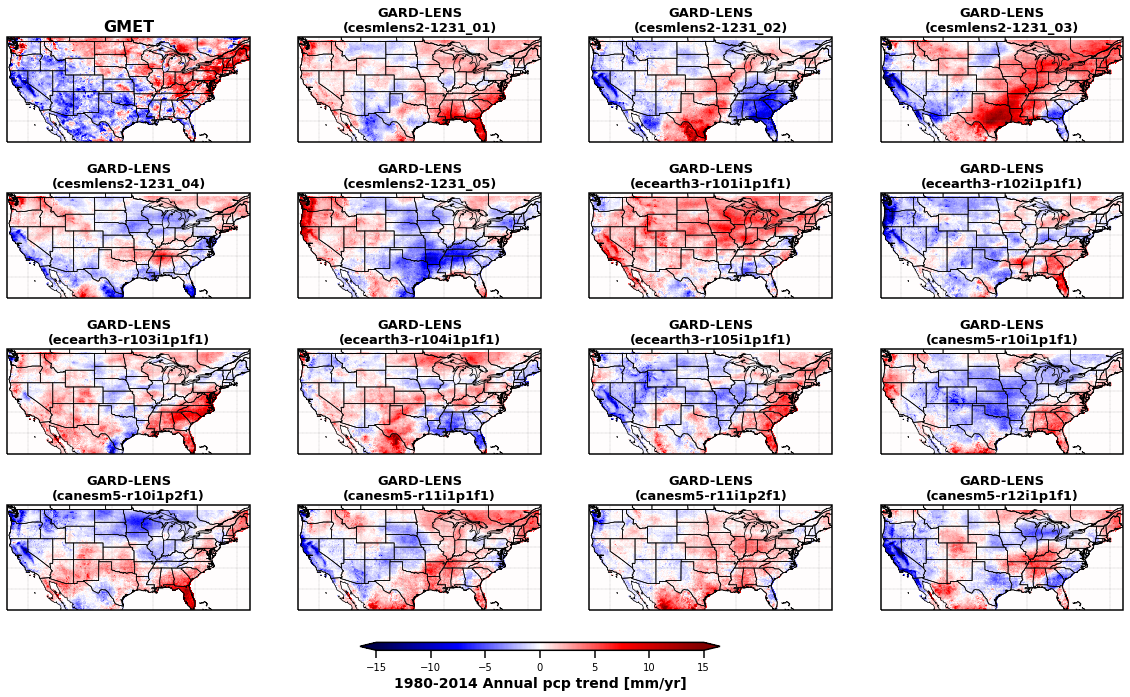

In [6]:



var = 'pcp'
stat = 'sum'
gardlens = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GARDLENS_%s_stats_CONUS.nc'%var)


fig = plt.figure(figsize=(20,11))
proj = ccrs.PlateCarree()

ax1 = fig.add_subplot(4,4,1,projection=proj)

vmin=-15; vmax=15.
gmet_mean = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GMET_stats_CONUS.nc')['%s_%s'%(var,stat)].polyfit(dim="year", deg=1,skipna=True).polyfit_coefficients.sel(degree=1)
plot_map(gmet_mean,cmap='seismic',ax=ax1,ylim=(25.,50.),vmin=vmin,vmax=vmax,colorbar_label='[$^o$C]',
         colorbar=False,bottom=False,left=False)
ax1.set_title('GMET')


i=2
for gcm in ('cesmlens2','ecearth3','canesm5'):

    print(gcm)
    j=1
    for e in ens_list[gcm][:5]:
        
        ax1 = fig.add_subplot(4,4,i,projection=proj)
    
        gcm_mean = gardlens[stat].sel(n_ens=gardlens.gcm==gcm).sel(year=slice('1980','2014')).polyfit(dim="year", deg=1,skipna=True).polyfit_coefficients.sel(degree=1)
    
        im = plot_map(gcm_mean.sel(n_ens=j),cmap='seismic',ax=ax1,ylim=(25.,50.),vmin=vmin,vmax=vmax,
                      colorbar=False,bottom=False,left=False)#,colorbar_label='[$^o$C]')
        ax1.set_title('GARD-LENS\n(%s-%s)'%(gcm,e),fontsize=13)

        j+=1
        i+=1


ax2 = fig.add_axes([0.37, 0.09, 0.25, 0.01])
cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', 
                               cmap='seismic',
                               norm=mpl.colors.Normalize(vmin, vmax),  # vmax and vmin
                               extend='both',
                               label='1980-2014 Annual pcp trend [mm/yr]')


plt.savefig('figures/GARDLENS_annual_pcp_trend_example.jpg',bbox_inches='tight',dpi=1200)
plt.show()